In [10]:
import matplotlib.pyplot as plt
import numpy as np
import csv

In [11]:
def plot_results(path,num_algorithms):
    #num_algorithms = 5
    results = [[] for n in range(num_algorithms)]

    with open(path, 'r', newline='') as csvfile:
        reader = csv.reader(csvfile, delimiter=',', quotechar='\'')
        labels = next(reader)
        for row in reader:
            for i in range(num_algorithms):
                results[i].append(float(row[i]))

    tabela = [None]*num_algorithms

    def table_row(array):
        row = [f"{np.average(array):.2f}", f"{np.min(array):.2f}", f"{np.max(array):.2f}", f"{np.median(array):.2f}",
               f"{np.std(array):.2f}"]
        return row

    for i in range(num_algorithms):
        tabela[i] = table_row(results[i])

    fig, ax = plt.subplots()
    # hide axes
    fig.patch.set_visible(False)

    ax.axis('off')
    ax.axis('tight')
    colLabels = ['Media', 'Melhor', 'Pior', 'Mediana', 'Desvio Padrão']
    rowLabels = ["(1+1)-ES", "Pop. Iso.", "Pop. N. Iso."]
    table = ax.table(tabela, colLabels=colLabels, rowLabels=labels, loc='center')
    table.scale(3, 2)
    table.set_fontsize(15)
    fig.tight_layout()

    fig_boxplot, ax_boxplot = plt.subplots()
    ax_boxplot.boxplot(x=results, labels=labels)

    plt.show()

def avg_from_file(filepath):
   with open(filepath, 'r', newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=',', quotechar='\'')
    sum =0;
    row_0 = list(reader)[0];
    for value in row_0:
        sum += float(value)

    return sum/len(row_0)




# Comparação

Comparação entre os seguintes métodos:
<br>(1+1)-ES
<br>(10+20)-ES isotrópico
<br>(10+20)-ES não isotrópico
<br>(5+10)-ES isotrópico
<br>(5+10)-ES não isotrópico

## 30 execuções - 200000 chamadas de função objetivo
### RK4



/tmp/ipykernel_19072/2304871609.py:33: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout()


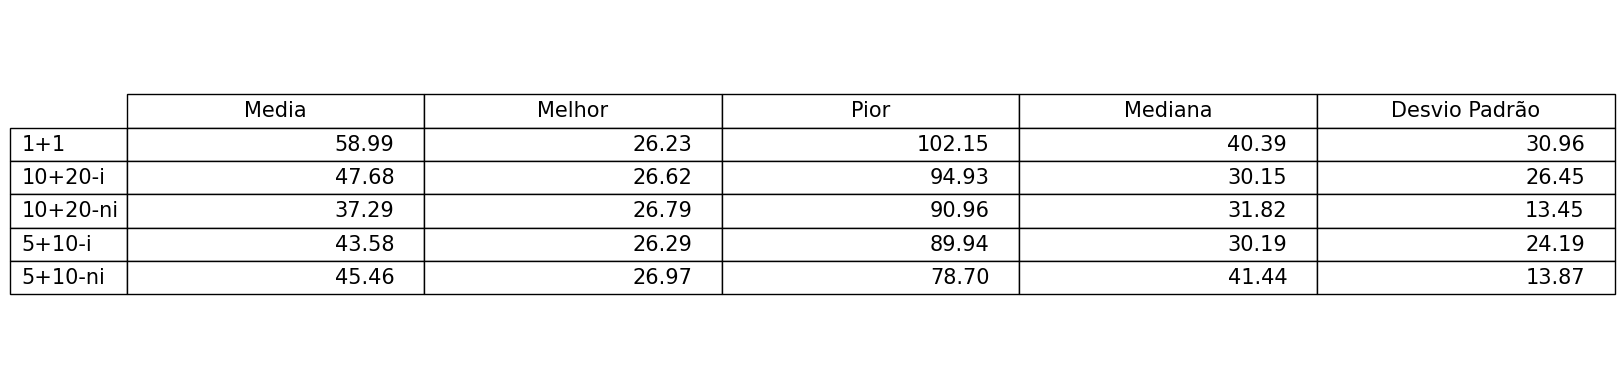

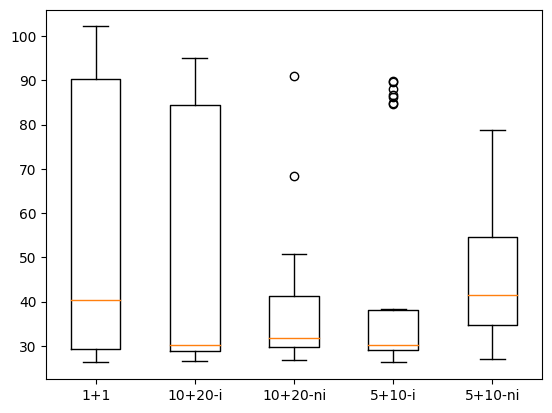

In [12]:
plot_results(f'../results/rk4/comparison-30runs-200000it.csv',5)

In [13]:
## LSODA

/tmp/ipykernel_19072/2304871609.py:33: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout()


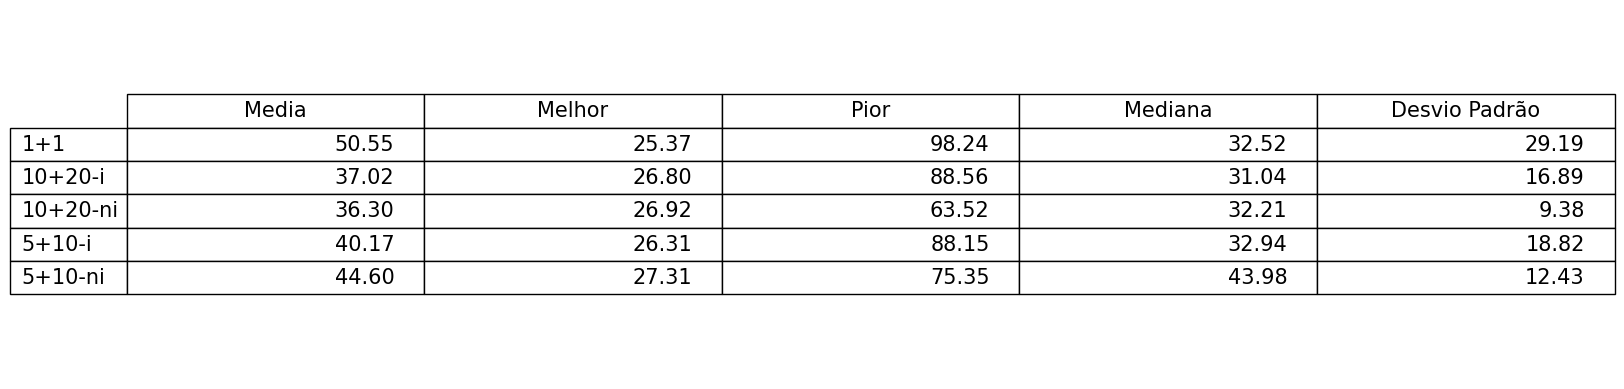

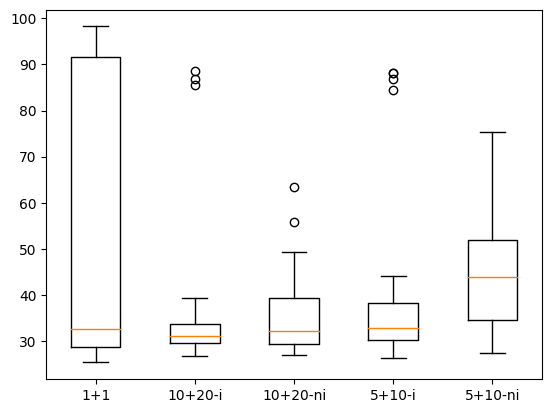

In [14]:
plot_results(f'../results/exp2/GRN5-200000-C++_impl.csv',5)


## 30 execuções - 20000 chamadas de função objetivo
## LSODA
### C++ implementation

In [15]:
print(f"Average time for each run: {avg_from_file('../results/exp1/GRN5-20000-C++_impl-time.csv')}")

Average time for each run: 48.4


/tmp/ipykernel_19072/2304871609.py:33: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout()


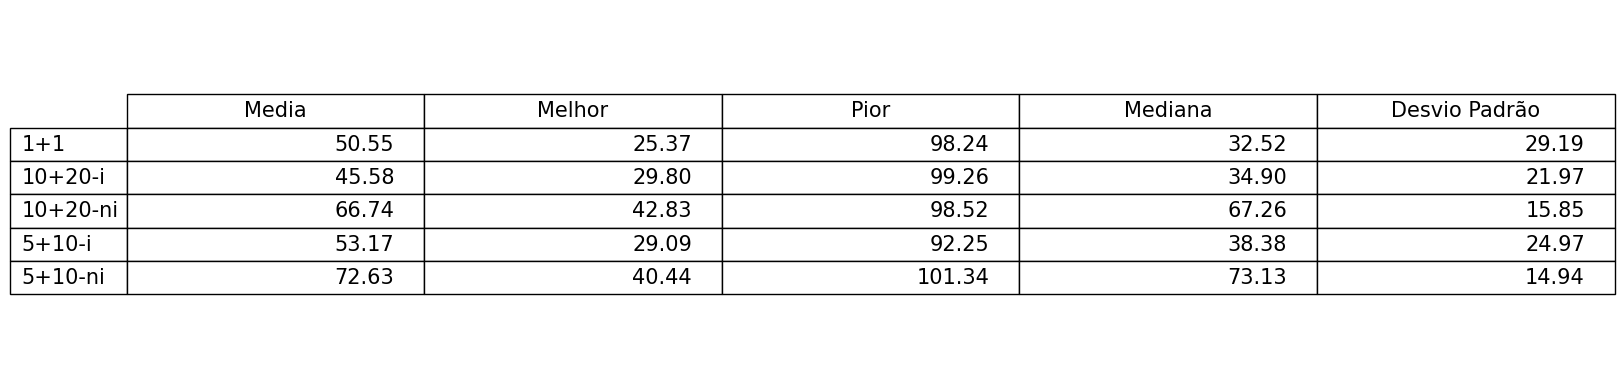

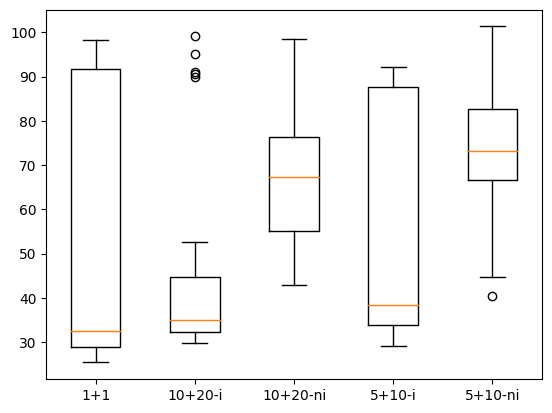

In [16]:

plot_results(f'../results/exp1/GRN5-20000-C++_impl.csv',5)

### Python implementation

In [17]:
print(f"Average time for each run: {avg_from_file('../results/exp1/GRN5-20000-python_impl-time.csv')}")

Average time for each run: 1863.5421545505524


In [18]:
plot_results(f'../results/exp1/GRN5-20000-python_impl.csv',5)

ValueError: could not convert string to float: '1+1'